# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### The data represents  when human agents make phone calls to a list of clients to sell the deposit. Thus, the result is a binary unsuccessful or successful contact.
We have different categories that build the customer profile that can help the model predicting the result.

1. Customer data - Reveals customer education, job, marital status, loan information(If any)
2. Current Campaign Last Contacted data - Comm type, month & day, duration of call(When contacted)
3. Additional Campaign data - Number of contacts, Days since last contact, Previous attempts, Previous Campain result.
4. Social and economic attributes - Employment rate, Consumer price & confidence index, Interest rate, No of Employees.

From basic understanding, We need to examine what type of customers have purchased marketed products so that the predictions can be used for targeted marketing.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### No Missing data

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
fig = px.pie(df, names='y', title="Subscription Distribution")
fig.update_layout(width=800, height=600)
fig.show()

#### Data is heavily imbalanced where the customers with positive outcome is only 11.3%
#### So, once the data is cleaned and converted to numerical features, we can use SMOTE to resample the data so that we can remove imbalance.

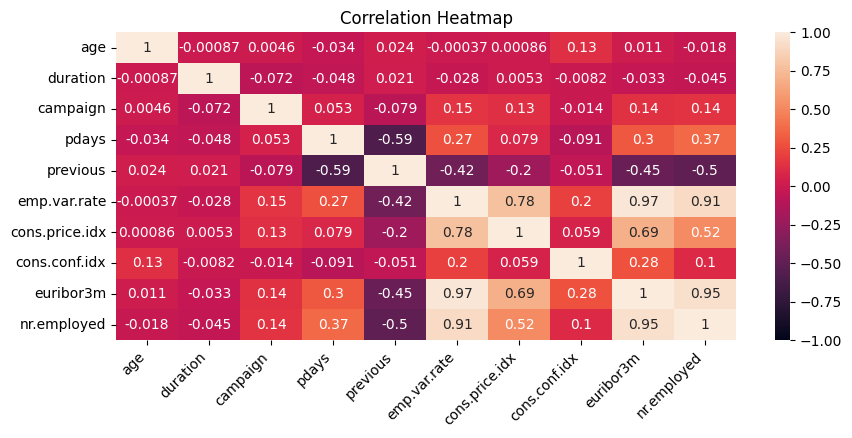

In [8]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap for the numerical features

plt.figure(figsize=(10, 4))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
#plt.savefig('images/Correlation_HeatMap.png')
plt.show()

##### Column categories, description and encoding that can be used.
##### From Heatmap, target variable(y) is highly correlated with campaign and socio econimoic factors.
##### At the same time, emp.var.rate, nr.employed, euribor3m are highly correlated over 0.9, This means, two of these columns might not add much value in the predictions. Lets consider euribor3m, which is the interest rate provided by the bank on the deposits.

age             int64  - Numeric, needs scaling

job             object - Categorical, One Hot encoding

marital         object - Categorical, One Hot encoding

education       object - Categorical, One Hot encoding

default         object - Categorical, One Hot encoding

housing         object - Categorical, One Hot encoding

loan            object - Categorical, One Hot encoding

contact         object - Categorical, Binary encoding

month           object - Categorical, One Hot encoding

day_of_week     object - Categorical, One Hot encoding 

duration        int64  - Suggested that this metric does not make sense until the customer is connected over call 
                         which can lead to wrong predictions. So, drop the column.
                         
campaign        int64  - Numeric, needs scaling

pdays           int64  - Numeric, needs scaling

previous        int64  - Numeric, needs scaling

poutcome        object - Categorical, One Hot encoding

emp.var.rate    float64 - Drop the column as its 97% correlated with euribor3m

cons.price.idx  float64 - Numeric, needs scaling

cons.conf.idx   float64 - Numeric, needs scaling

euribor3m       float64 - Numeric, needs scaling

nr.employed     float64 - Drop the column as its 97% correlated with euribor3m

y               int64 -   Numeric Target Variable - Map 0 as No and 1 as Yes


#### Visualizations of Categorical & Numerical columns

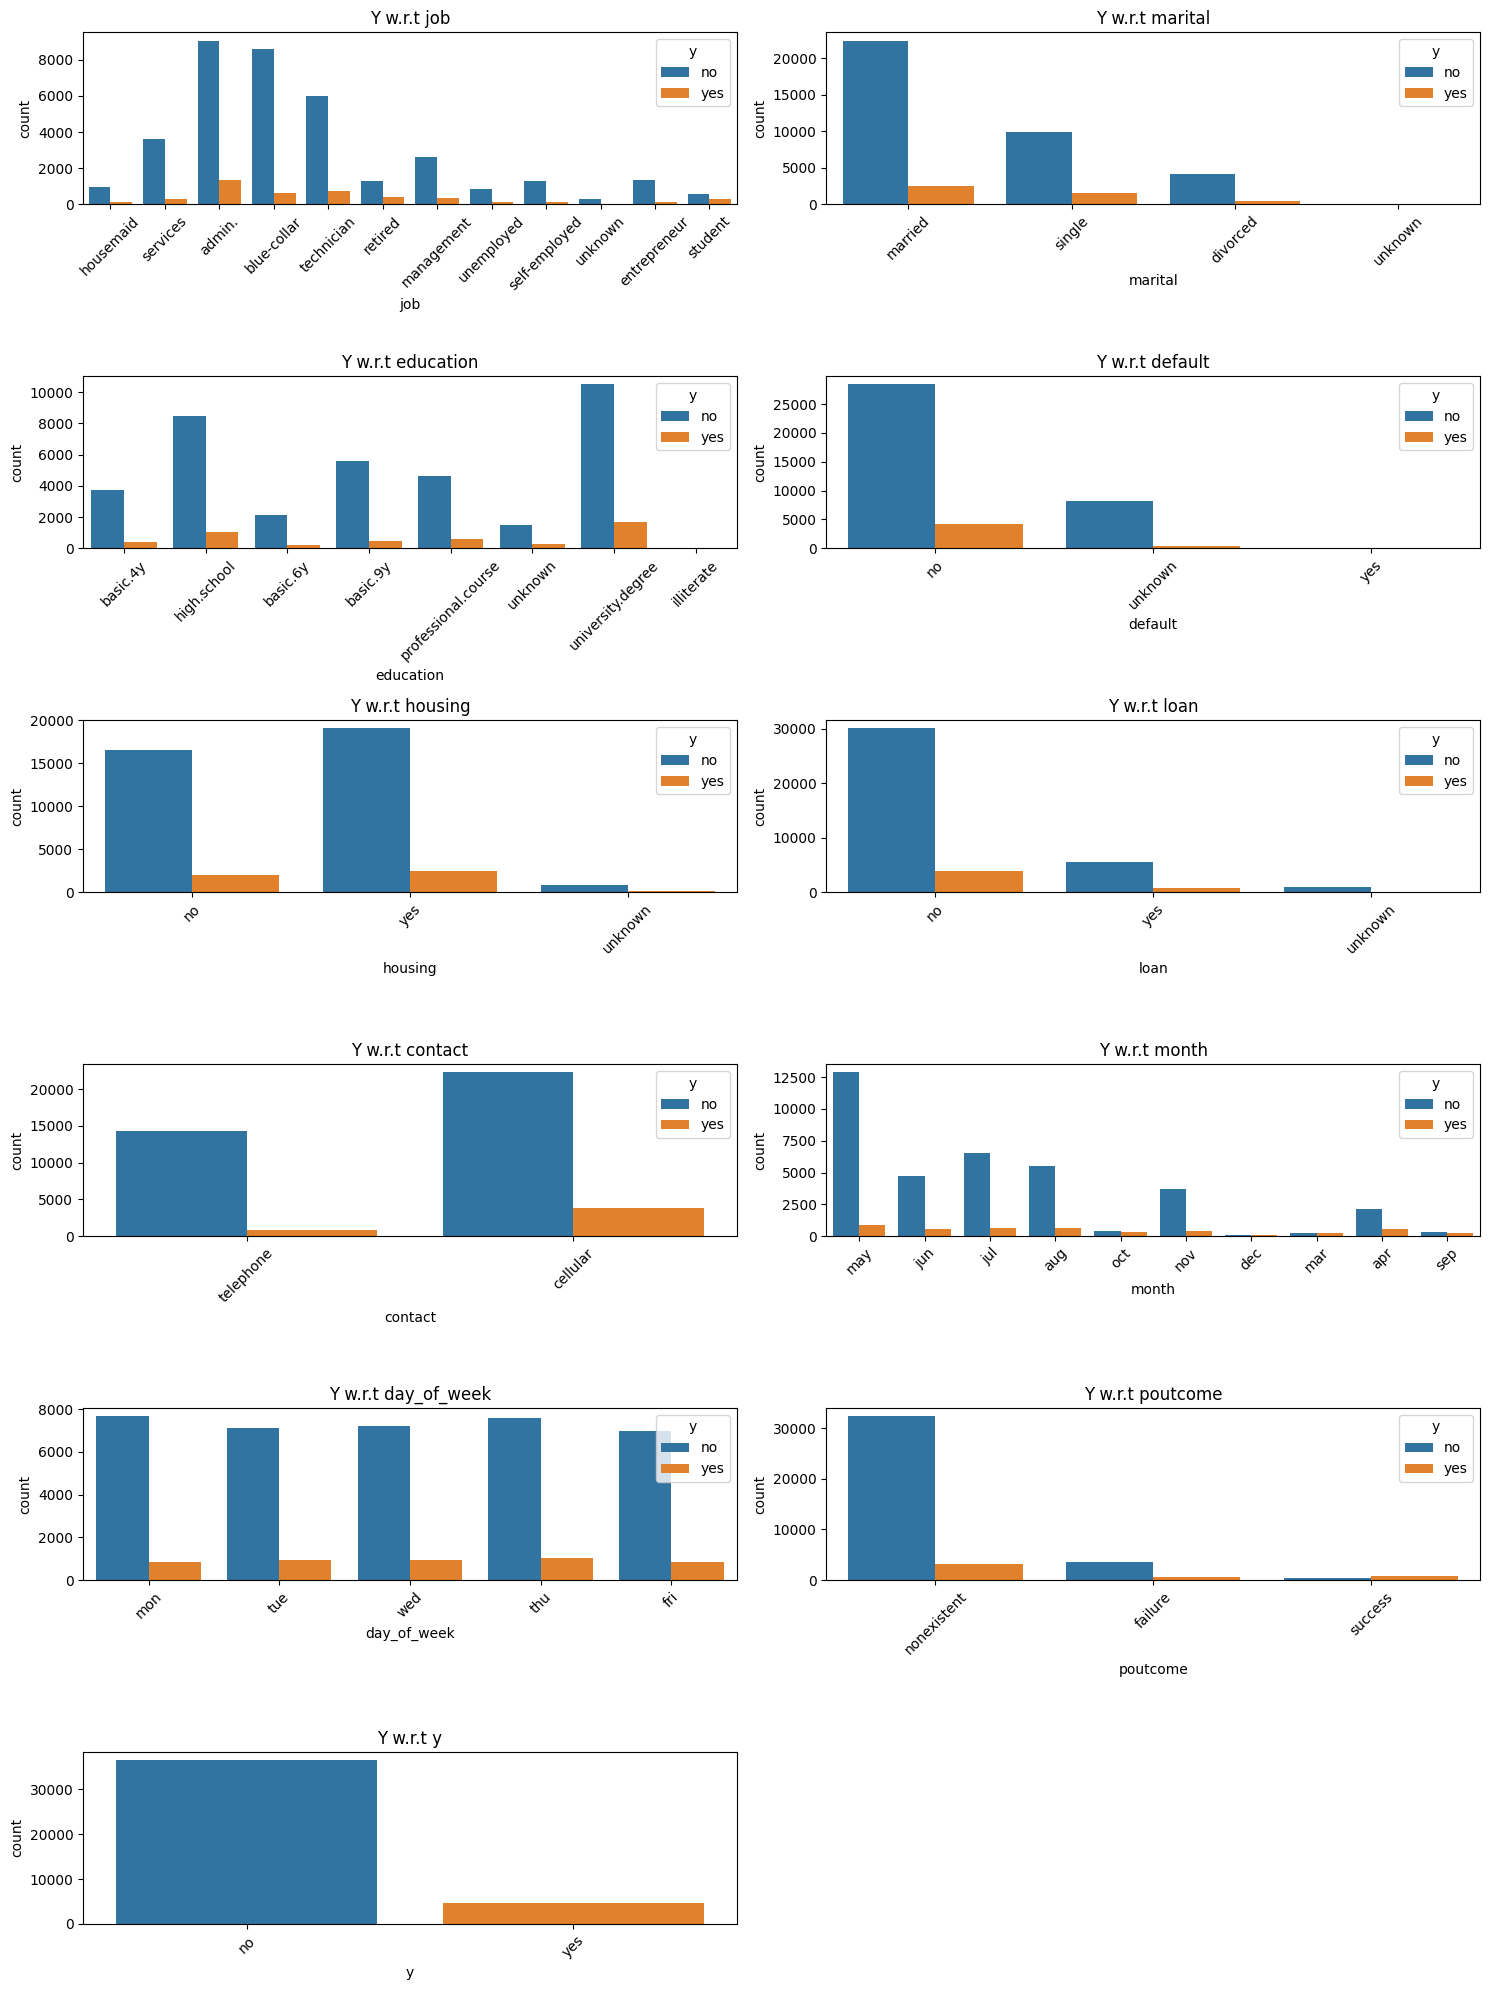

In [9]:
# Select only categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

rows = int(len(categorical_columns)/2) + 1
cols = 2
plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows,cols,i)
    plt.title(f"Y w.r.t {col}")
    plt.xticks(rotation=45)
    sns.countplot(data=df, x=df[col],hue=df['y'])

plt.tight_layout()
#plt.savefig('images/Bar_Charts_of_Categorical_Columns_with_Grade.png')
plt.show()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


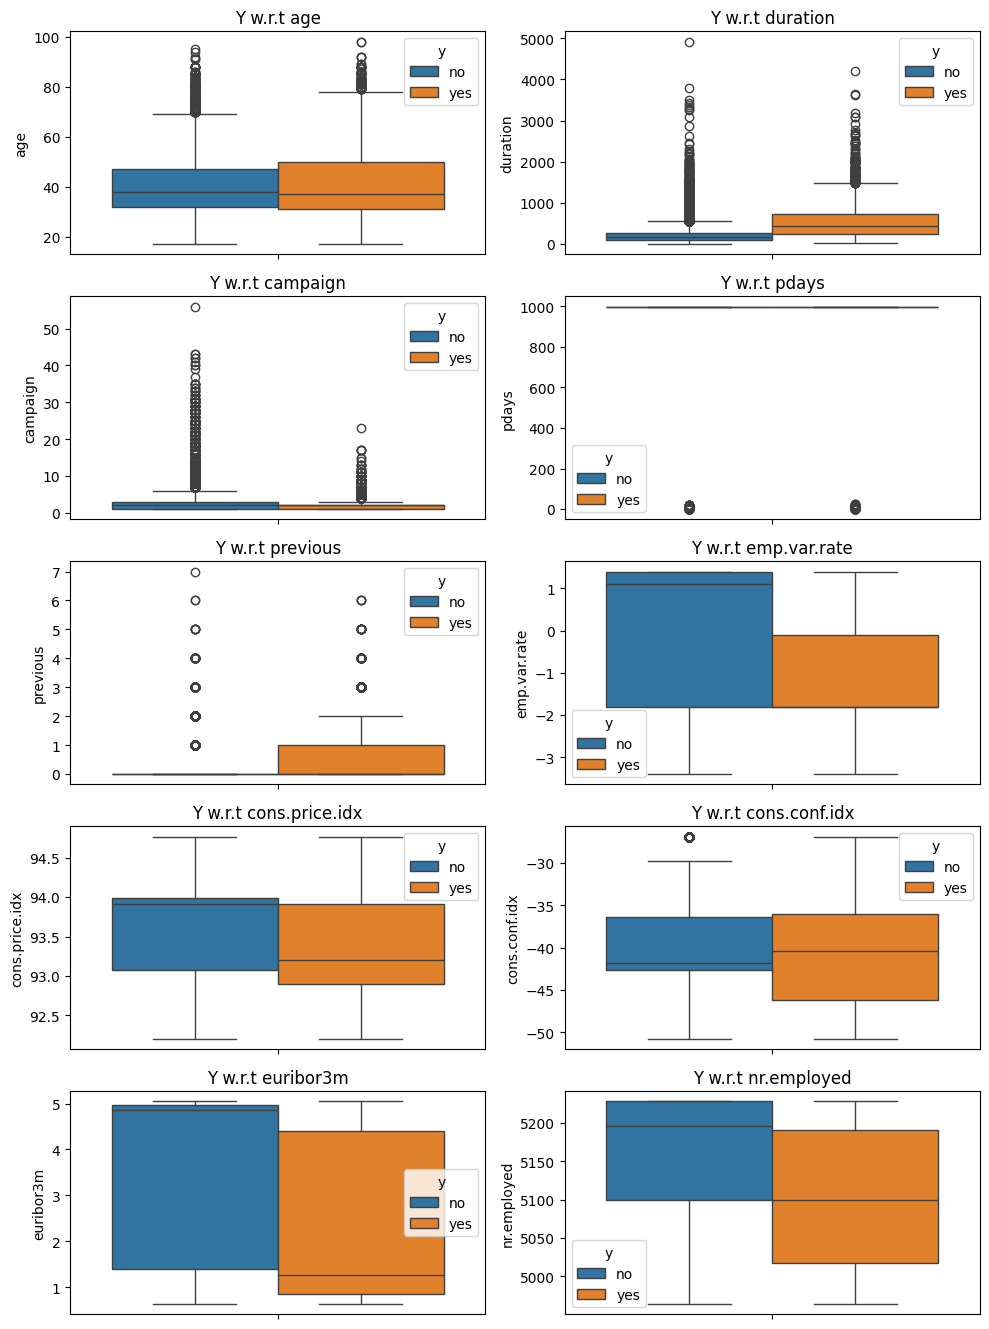

In [10]:
# Select only numerical variables
columns = df.select_dtypes(include=['float64', 'int64']).columns
print(columns)

rows = int(len(columns)/2) + 1
cols = 2
plt.figure(figsize=(10, 16))

for i, col in enumerate(columns, 1):
    plt.subplot(rows,cols,i)
    plt.title(f"Y w.r.t {col}")
    sns.boxplot(data=df, y=df[col],hue=df['y'])

plt.tight_layout()
#plt.savefig('images/Box_Charts_of_Numericsl_Columns_with_Grade.png')
plt.show()

### Problem 4: Understanding the Task

##### Business Objective
Classify whether the customer will buy the bank products and also reveal what factors can influence this prediction.
This could lead agents to be more productive with targeted customers rather than customers who are not interested.

So, we should have model with high Accuracy, Recall and F1-scores. Lets evaluate different models for this classification problem.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:
#Model Selection, Model Training & Hyper Parameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [12]:
# Columns are split into dropped, numerical and categorical

drop_col =['duration','emp.var.rate','nr.employed']
num_col = ['age','campaign','pdays','previous','cons.price.idx','cons.conf.idx','euribor3m']
cat_col = ['job','marital','education','default','housing','loan','contact', 'month', 'day_of_week', 'poutcome']

In [13]:
# Drop the columns that are not needed
df.drop(drop_col, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
# Map Y feature data into binary target column.
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [16]:
# Define X and y variables for splitting data
X = df.drop(columns=['y']) 
y = df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (32950, 20). Training labels size: (32950,)
Test set size: (8238, 20). Test labels size: (8238,)


In [18]:
# Preprocesser that does OneHot encoding on categorical columns and scales the numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),  
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_col)  
    ]
)

In [19]:
#Perform OHE and sclae the numerical features using the preprocessor
X_train_std = preprocessor.fit_transform(X_train)
X_test_std = preprocessor.transform(X_test)

In [20]:
nc = num_col
cc = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_col)
all_cols = list(nc) + list(cc)
all_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [21]:
#As the data is heavily Imbalanaced, Lets use SMOTE to reduce the imbalace effects on model prediction
from imblearn.over_sampling import SMOTE
from collections import Counter

desired_ratio = 0.5
smote = SMOTE(sampling_strategy=desired_ratio, random_state=42)
Xr_train_std, yr_train = smote.fit_resample(X_train_std, y_train)

print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(yr_train)}")
print(X_train_std.shape)
print(Xr_train_std.shape)

Before SMOTE: Counter({0: 29245, 1: 3705})
After SMOTE: Counter({0: 29245, 1: 14622})
(32950, 50)
(43867, 50)


In [22]:
#Convert the 
X_train_std_df = pd.DataFrame(X_train_std, columns=all_cols)
Xr_train_std_df = pd.DataFrame(Xr_train_std, columns=all_cols)
X_test_std_df = pd.DataFrame(X_test_std, columns=all_cols)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

##### We can use simple decision tree with default paremeters as baseline and collect the metrics as baseline evaluation metrics.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train a simple Decision Tree model
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(Xr_train_std_df, yr_train)

# Generate predictions
yr_pred = base_model.predict(X_test_std_df)

# Compute evaluation metrics
base_metrics = {
    "Accuracy": accuracy_score(y_test, yr_pred),
    "Precision": precision_score(y_test, yr_pred, zero_division=0),
    "Recall": recall_score(y_test, yr_pred),
    "F1-score": f1_score(y_test, yr_pred),
    "ROC-AUC": roc_auc_score(y_test, yr_pred)
}

# Display results in a DataFrame
base_metrics_df = pd.DataFrame(base_metrics, index=['Decision Tree Baseline'])
base_metrics_df

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Decision Tree Baseline,0.837218,0.304432,0.337968,0.320324,0.619552


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [24]:
import time
from sklearn.linear_model import LogisticRegression
# Initialize and train a Logistic Regression model
basic_model = LogisticRegression()
#Record time take for training and prediction
start_time_basic = time.time()
##
basic_model.fit(Xr_train_std_df, yr_train)
y_pred_test = basic_model.predict(X_test_std_df)
##
train_time_basic = time.time() - start_time_basic
##
yr_pred_train = basic_model.predict(Xr_train_std_df)

### Problem 9: Score the Model

What is the accuracy of your model?

In [25]:
# Compute evaluation metrics
basic_metrics = {
    "Name": 'Logistic Regression',
    "Train Time": train_time_basic,
    "Train Accuracy": accuracy_score(yr_train, yr_pred_train),
    "Test Accuracy": accuracy_score(y_test, y_pred_test)
}

# Display results in a DataFrame
basic_metrics_df = pd.DataFrame([basic_metrics])
basic_metrics_df

,Name,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.666673,0.792897,0.867444


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [26]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression()
}

# DataFrames to store metrics & confusion matrices
comp_results_df = pd.DataFrame(columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])

# Train, Predict & Evaluate each model
for name, model in models.items():
    start_train = time.time()
    model.fit(Xr_train_std_df, yr_train)
    y_pred_test = model.predict(X_test_std_df)
    train_time = time.time() - start_train

    yr_pred_train = model.predict(Xr_train_std_df)

    comp_metrics = {
    "Model": model,
    "Train Time": train_time,
    "Train Accuracy": accuracy_score(yr_train, yr_pred_train),
    "Test Accuracy": accuracy_score(y_test, y_pred_test)
    }
    # Append metrics to results_df
    comp_results_df = pd.concat([comp_results_df, pd.DataFrame([comp_metrics])], ignore_index=True)

# Display evaluation results
print("\nModel Performance Comparison:")
comp_results_df


Model Performance Comparison:


,Model,Train Time,Train Accuracy,Test Accuracy
0,DecisionTreeClassifier(),0.569170,0.996512,0.835033
1,KNeighborsClassifier(),1.583851,0.906741,0.788784
2,SVC(),237.558343,0.822258,0.877519
3,LogisticRegression(),0.598658,0.792897,0.867444


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [27]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression()
}

params_grid = {
	"Decision Tree": {
		"criterion": ['gini','entropy'],
		"max_depth": [3, 5, 7, 9],
		"max_features": [1, 2, 3, 4],
		"min_samples_split": [5, 10, 15, 20]
	},
    "KNN": {
        "n_neighbors": [3,5,7,9],
        "weights": ['uniform', 'distance']
    },
	"SVM": {
        "kernel": ['linear', 'rbf'],
        "C": [0.1, 1, 10]
    },
    "Logistic Regression": {
		"C": [0.01, 0.1, 1, 10], 
		"penalty": ['l1','l2'],
		"solver": ['lbfgs', 'liblinear','saga']
    }
}

In [28]:
# Initiate empty arrays and Dataframe to store results

best_models = {}
best_params = {}
results_tuned_df = pd.DataFrame(columns=["Model", "Best Params", "Best Estimator", "Best Score", "Train Time", "Train Accuracy", "Test Accuracy"])
confusion_matrices_tuned_df = {}

# Loop through all the models and record the evaluation metrics into Dataframe

for name, model in models.items():
    # Apply GridSearchCV for hyperparameter tuning
    model_grid = GridSearchCV(model, param_grid=params_grid[name], cv=3, scoring='accuracy', n_jobs=2)
    start_train = time.time()
    print(f'Training Model:{name} - {model}')
    print(f'Parameters:{params_grid[name]}')
    model_grid.fit(Xr_train_std_df, yr_train)      
    best_models[name] = model_grid.best_estimator_
    best_params[name] = model_grid.best_params_
    y_pred_test = best_models[name].predict(X_test_std_df)
    train_time = time.time() - start_train
    yr_pred_train = best_models[name].predict(Xr_train_std_df)
    
    # Compute metrics
    metrics = {
        "Model": name,
        "Best Params": model_grid.best_params_,
        "Best Score": model_grid.best_score_,
        "Best Estimator": model_grid.best_estimator_,
        "Train Time": train_time,
        "Train Accuracy": accuracy_score(yr_train, yr_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test)
    }
    
    results_tuned_df = pd.concat([results_tuned_df, pd.DataFrame([metrics])], ignore_index=True)

    # Print best model
    print(f"Best Parameters for {name}: {model_grid.best_params_}")


# Display the results
print("\nModel Parameters and scores:")
results_tuned_df

Training Model:Decision Tree - DecisionTreeClassifier()
Parameters:{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9], 'max_features': [1, 2, 3, 4], 'min_samples_split': [5, 10, 15, 20]}
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_split': 10}
Training Model:KNN - KNeighborsClassifier()
Parameters:{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Training Model:SVM - SVC()
Parameters:{'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Training Model:Logistic Regression - LogisticRegression()
Parameters:{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear', 'saga']}
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Model Parameters and scores:


,Model,Best Params,Best Estimator,Best Score,Train Time,Train Accuracy,Test Accuracy
0,Decision Tree,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...","DecisionTreeClassifier(max_depth=9, max_featur...",0.808855,17.210161,0.797319,0.863074
1,KNN,"{'n_neighbors': 3, 'weights': 'distance'}","KNeighborsClassifier(n_neighbors=3, weights='d...",0.869629,38.442609,0.996444,0.810755
2,SVM,"{'C': 10, 'kernel': 'rbf'}",SVC(C=10),0.869562,3896.097953,0.908679,0.886744
3,Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",LogisticRegression(C=0.01),0.793216,45.055876,0.793717,0.867201


#### KNN has best score but SVC and Logistic Regression have best Test acuracy.
#### SVC takes enormous amount of time for model training. Not appropriate for large datasets.
#### Lets test SVC with linear kernel as opposed to SVC with 'rbf' kernel.

In [29]:
from sklearn.svm import LinearSVC

# Initialize and train a Logistic Regression model
linear_svc = LinearSVC()
#Record time take for training and prediction
start_time_basic = time.time()
##
linear_svc.fit(Xr_train_std_df, yr_train)
y_pred_test = linear_svc.predict(X_test_std_df)
##
train_time_basic = time.time() - start_time_basic
##
yr_pred_train = linear_svc.predict(Xr_train_std_df)

# Compute evaluation metrics
linear_svc_metrics = {
    "Name": 'Linear SVC',
    "Train Time": train_time_basic,
    "Train Accuracy": accuracy_score(yr_train, yr_pred_train),
    "Test Accuracy": accuracy_score(y_test, y_pred_test)
}

# Display results in a DataFrame
linear_svc_metrics_df = pd.DataFrame([linear_svc_metrics])
linear_svc_metrics_df

,Name,Train Time,Train Accuracy,Test Accuracy
0,Linear SVC,0.733424,0.792646,0.869143


#### Training Time has greatly reduced with Linear SVC kernel.
#### Running Final GridSearch on all the models. Replace SVC with Linear SVC to achieve better training performance

In [30]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": LinearSVC(),
    "Logistic Regression": LogisticRegression()
}

params_grid = {
	"Decision Tree": {
		"criterion": ['gini','entropy'],
		"max_depth": [3, 5, 7, 9],
		"max_features": [1, 2, 3, 4],
		"min_samples_split": [5, 10, 15, 20]
	},
    "KNN": {
        "n_neighbors": [3,5,7,9],
        "weights": ['uniform', 'distance']
    },
	"SVM": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ['l1','l2']
    },
    "Logistic Regression": {
		"C": [0.01, 0.1, 1, 10], 
		"penalty": ['l1','l2'],
		"solver": ['lbfgs', 'liblinear','saga']
    }
}

In [31]:
# Initiate empty arrays and Dataframe to store results

best_models = {}
best_params = {}
results_tuned_df = pd.DataFrame(columns=["Model", "Best Params", "Best Estimator", "Best Score", "Train Time", "Train Accuracy", "Test Accuracy"])
confusion_matrices_tuned_df = {}

# Loop through all the models and record the evaluation metrics into Dataframe

for name, model in models.items():
    # Apply GridSearchCV for hyperparameter tuning
    model_grid = GridSearchCV(model, param_grid=params_grid[name], cv=3, scoring='accuracy', n_jobs=2)
    start_train = time.time()
    print(f'Training Model:{name} - {model}')
    print(f'Parameters:{params_grid[name]}')
    model_grid.fit(Xr_train_std_df, yr_train)      
    best_models[name] = model_grid.best_estimator_
    best_params[name] = model_grid.best_params_
    y_pred_test = best_models[name].predict(X_test_std_df)
    train_time = time.time() - start_train
    yr_pred_train = best_models[name].predict(Xr_train_std_df)
    
    # Compute metrics
    metrics = {
        "Model": name,
        "Best Params": model_grid.best_params_,
        "Best Score": model_grid.best_score_,
        "Best Estimator": model_grid.best_estimator_,
        "Train Time": train_time,
        "Train Accuracy": accuracy_score(yr_train, yr_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test)
    }
    
    results_tuned_df = pd.concat([results_tuned_df, pd.DataFrame([metrics])], ignore_index=True)

    # Print best model
    print(f"Best Parameters for {name}: {model_grid.best_params_}")


# Display the results
print("\nModel Parameters and scores:")
results_tuned_df

Training Model:Decision Tree - DecisionTreeClassifier()
Parameters:{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9], 'max_features': [1, 2, 3, 4], 'min_samples_split': [5, 10, 15, 20]}
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'min_samples_split': 5}
Training Model:KNN - KNeighborsClassifier()
Parameters:{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Training Model:SVM - LinearSVC()
Parameters:{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
Best Parameters for SVM: {'C': 0.1, 'penalty': 'l1'}
Training Model:Logistic Regression - LogisticRegression()
Parameters:{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear', 'saga']}
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Model Parameters and scores:


,Model,Best Params,Best Estimator,Best Score,Train Time,Train Accuracy,Test Accuracy
0,Decision Tree,"{'criterion': 'entropy', 'max_depth': 9, 'max_...","DecisionTreeClassifier(criterion='entropy', ma...",0.794675,12.824279,0.771901,0.878854
1,KNN,"{'n_neighbors': 3, 'weights': 'distance'}","KNeighborsClassifier(n_neighbors=3, weights='d...",0.869629,40.860792,0.996444,0.810755
2,SVM,"{'C': 0.1, 'penalty': 'l1'}","LinearSVC(C=0.1, penalty='l1')",0.792350,11.041843,0.792532,0.869022
3,Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",LogisticRegression(C=0.01),0.793216,41.796403,0.793717,0.867201


#### Conclusion
##### KNN has best Training Accuracy & Score. Rest of the model have very close Training acuracy and scores.
##### LinearSVC has the best Test accuracy score with lower training time.
#### LinearSVC will be good fit for this dataset